In [63]:
import numpy as np # matrix tools
import matplotlib.pyplot as plt # for basic plots
import seaborn as sns # for nicer plots
import pandas as pd
from glob import glob
import re
import warnings
warnings.filterwarnings('ignore')
from skimage.io import imread
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import tensorflow as tf

import keras

In [64]:
# Reproducability
def set_seed(seed=31415):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
set_seed(31415)

In [65]:
%matplotlib inline
import os
for dirname, _, filenames in os.walk('./Desktop/LUNG CANCER DATASETS/'):
    print(dirname,"______")
    for filename in filenames:
        print(os.path.join(dirname, filename))

./Desktop/LUNG CANCER DATASETS/ ______
./Desktop/LUNG CANCER DATASETS/full_archive.npz
./Desktop/LUNG CANCER DATASETS/overview.csv
./Desktop/LUNG CANCER DATASETS/dicom_dir ______
./Desktop/LUNG CANCER DATASETS/dicom_dir\ID_0000_AGE_0060_CONTRAST_1_CT.dcm
./Desktop/LUNG CANCER DATASETS/dicom_dir\ID_0001_AGE_0069_CONTRAST_1_CT.dcm
./Desktop/LUNG CANCER DATASETS/dicom_dir\ID_0002_AGE_0074_CONTRAST_1_CT.dcm
./Desktop/LUNG CANCER DATASETS/dicom_dir\ID_0003_AGE_0075_CONTRAST_1_CT.dcm
./Desktop/LUNG CANCER DATASETS/dicom_dir\ID_0004_AGE_0056_CONTRAST_1_CT.dcm
./Desktop/LUNG CANCER DATASETS/dicom_dir\ID_0005_AGE_0048_CONTRAST_1_CT.dcm
./Desktop/LUNG CANCER DATASETS/dicom_dir\ID_0006_AGE_0075_CONTRAST_1_CT.dcm
./Desktop/LUNG CANCER DATASETS/dicom_dir\ID_0007_AGE_0061_CONTRAST_1_CT.dcm
./Desktop/LUNG CANCER DATASETS/dicom_dir\ID_0008_AGE_0051_CONTRAST_1_CT.dcm
./Desktop/LUNG CANCER DATASETS/dicom_dir\ID_0009_AGE_0048_CONTRAST_1_CT.dcm
./Desktop/LUNG CANCER DATASETS/dicom_dir\ID_0010_AGE_0060_CON

# Exploratory data analysis

In [66]:
BASE_IMG_PATH=os.path.join('.','./Desktop/LUNG CANCER DATASETS/')
path= os.path.join(BASE_IMG_PATH,'overview.csv')
overview = pd.read_csv(path)
overview.head()

,Unnamed: 0,Age,Contrast,ContrastTag,raw_input_path,id,tiff_name,dicom_name
0,0,60,True,NONE,../data/50_50_dicom_cases\Contrast\00001 (1).dcm,0,ID_0000_AGE_0060_CONTRAST_1_CT.tif,ID_0000_AGE_0060_CONTRAST_1_CT.dcm
1,1,69,True,NONE,../data/50_50_dicom_cases\Contrast\00001 (10).dcm,1,ID_0001_AGE_0069_CONTRAST_1_CT.tif,ID_0001_AGE_0069_CONTRAST_1_CT.dcm
2,2,74,True,APPLIED,../data/50_50_dicom_cases\Contrast\00001 (11).dcm,2,ID_0002_AGE_0074_CONTRAST_1_CT.tif,ID_0002_AGE_0074_CONTRAST_1_CT.dcm
3,3,75,True,NONE,../data/50_50_dicom_cases\Contrast\00001 (12).dcm,3,ID_0003_AGE_0075_CONTRAST_1_CT.tif,ID_0003_AGE_0075_CONTRAST_1_CT.dcm
4,4,56,True,NONE,../data/50_50_dicom_cases\Contrast\00001 (13).dcm,4,ID_0004_AGE_0056_CONTRAST_1_CT.tif,ID_0004_AGE_0056_CONTRAST_1_CT.dcm


In [67]:
len(overview)

100

In [68]:
overview['Contrast'] = overview['Contrast'].map(lambda x: 1 if x else 0)

<AxesSubplot:xlabel='Age', ylabel='Density'>

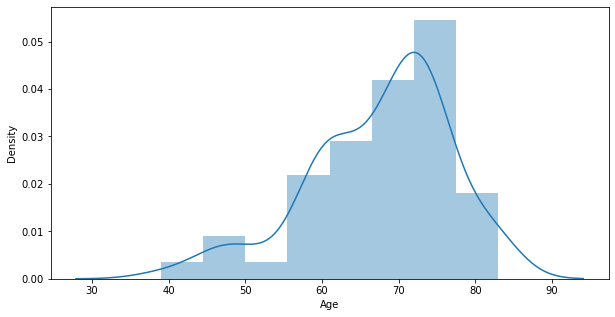

In [69]:
plt.figure(figsize=(10,5))
sns.distplot(overview['Age'])

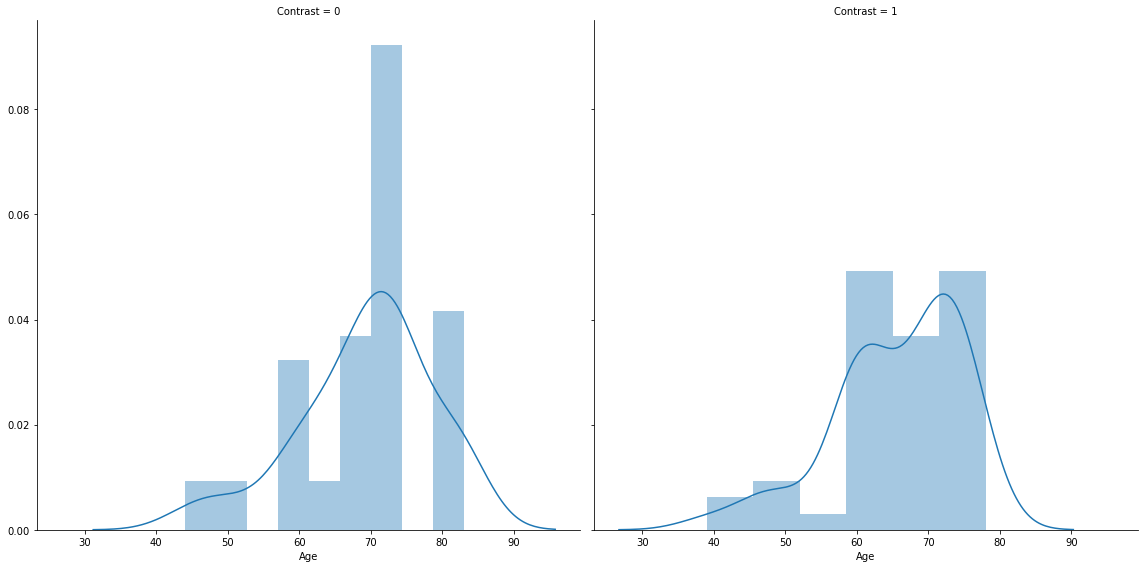

In [70]:
g = sns.FacetGrid(overview, col="Contrast", size=8)
g = g.map(sns.distplot, "Age")

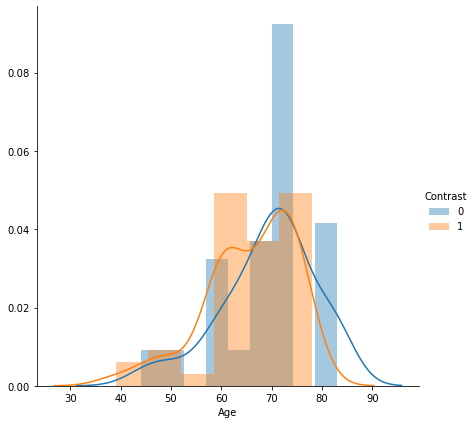

In [71]:
g = sns.FacetGrid(overview, hue="Contrast",size=6, legend_out=True)
g = g.map(sns.distplot, "Age").add_legend()

# Read Image Files

In [72]:
BASE_IMG_PATH=os.path.join('.','./Desktop/LUNG CANCER DATASETS/')
print(os.path.join(BASE_IMG_PATH,'tiff_images','*.tif'))
all_images_list = glob(os.path.join(BASE_IMG_PATH,'tiff_images','*.tif'))
all_images_list[:5]
#print(all_images_list)

.\./Desktop/LUNG CANCER DATASETS/tiff_images\*.tif


['.\\./Desktop/LUNG CANCER DATASETS/tiff_images\\ID_0000_AGE_0060_CONTRAST_1_CT.tif',
 '.\\./Desktop/LUNG CANCER DATASETS/tiff_images\\ID_0001_AGE_0069_CONTRAST_1_CT.tif',
 '.\\./Desktop/LUNG CANCER DATASETS/tiff_images\\ID_0002_AGE_0074_CONTRAST_1_CT.tif',
 '.\\./Desktop/LUNG CANCER DATASETS/tiff_images\\ID_0003_AGE_0075_CONTRAST_1_CT.tif',
 '.\\./Desktop/LUNG CANCER DATASETS/tiff_images\\ID_0004_AGE_0056_CONTRAST_1_CT.tif']

In [73]:
imread(all_images_list[0]).shape

(512, 512)

In [74]:
np.array(np.arange(81)).reshape(9,9)

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8],
       [ 9, 10, 11, 12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23, 24, 25, 26],
       [27, 28, 29, 30, 31, 32, 33, 34, 35],
       [36, 37, 38, 39, 40, 41, 42, 43, 44],
       [45, 46, 47, 48, 49, 50, 51, 52, 53],
       [54, 55, 56, 57, 58, 59, 60, 61, 62],
       [63, 64, 65, 66, 67, 68, 69, 70, 71],
       [72, 73, 74, 75, 76, 77, 78, 79, 80]])

In [75]:
np.array(np.arange(81)).reshape(9,9)[::3,::3]

array([[ 0,  3,  6],
       [27, 30, 33],
       [54, 57, 60]])

In [76]:
np.expand_dims(imread(all_images_list[0])[::4,::4],0).shape

(1, 128, 128)

In [77]:
jimread = lambda x: np.expand_dims(imread(x)[::2,::2],0)

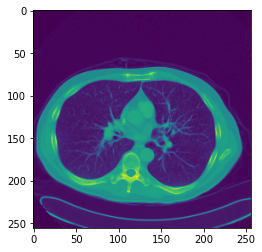

In [78]:
test_image = jimread(all_images_list[0])
plt.imshow(test_image[0])

In [79]:
check_contrast = re.compile(r'ID_([\d]+)_AGE_[\d]+_CONTRAST_([\d]+)_CT')
label = []
id_list = []
for image in all_images_list:
    id_list.append(check_contrast.findall(image)[0][0])
    label.append(check_contrast.findall(image)[0][1])

In [80]:
label_list = pd.DataFrame(label,id_list)

In [81]:
label_list.head()

,0
0000,1
0001,1
0002,1
0003,1
0004,1


In [82]:
images = np.stack([jimread(i) for i in all_images_list],0)

In [83]:
len(images)

100

# DATA SEGMENTATION

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
X_train, X_test, y_train, y_test = train_test_split(images, label_list, test_size=0.1, random_state=0)

In [87]:
n_train, depth, width, height = X_train.shape
n_test,_,_,_ = X_test.shape

In [88]:
n_train,depth, width, height

(90, 1, 256, 256)

In [89]:
input_shape = (width,height,depth)

In [90]:
input_shape

(256, 256, 1)

In [91]:
input_train = X_train.reshape((n_train, width,height,depth))
input_train.shape
input_train.astype('float32')
input_train = input_train / np.max(input_train)
input_train.max()

1.0

In [92]:
input_test = X_test.reshape(n_test, *input_shape)
input_test.astype('float32')
input_test = input_test / np.max(input_test)

In [93]:
import tensorflow as tf

In [94]:
output_train = tf.keras.utils.to_categorical(y_train, 2)
output_test = tf.keras.utils.to_categorical(y_test, 2)
output_train[5]

array([0., 1.], dtype=float32)

In [95]:
input_train.shape

(90, 256, 256, 1)

# MODELLING USING 2D CNN

In [97]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [98]:
batch_size = 20
epochs = 40

# A MaxPool2D layer is much like a Conv2D layer, except that it uses a simple maximum function instead 
of a kernel, with the pool_size parameter analogous to kernel_size.
A MaxPool2D layer doesn't have any trainable weights like a convolutional layer does in its kernel, 
however.

In [46]:
model2 = Sequential()
model2.add(Conv2D(50, (5, 5), activation='relu', input_shape=input_shape))
 # 32개의 4x4 Filter 를 이용하여 Convolutional Network생성
model2.add(MaxPooling2D(pool_size=(3, 3))) # 3x3 Maxpooling 
model2.add(Conv2D(30, (4, 4), activation='relu', input_shape=input_shape))
model2.add(MaxPooling2D(pool_size=(2, 2))) # 2x2 Maxpooling 
model2.add(Flatten()) # 쭉풀어서 Fully Connected Neural Network를 만든다. 
model2.add(Dense(2, activation='softmax'))

In [99]:
from tensorflow import keras
from tensorflow.keras import layers

model2 = keras.Sequential([

    # First Convolutional Block
    layers.Conv2D(50, (5, 5), 
                  activation='relu', 
                  input_shape=input_shape),
    layers.MaxPool2D(pool_size=(3, 3)),

    # Second Convolutional Block
    layers.Conv2D(30, (4, 4), 
                  activation='relu', 
                  input_shape=input_shape),
    layers.MaxPool2D(pool_size=(2, 2)),

    # Third Convolutional Block
    layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding='same'),
    layers.MaxPool2D(),

    # Classifier Head
    layers.Flatten(),
    layers.Dense(2, activation='softmax'),
    
])
#model.summary()

In [100]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 252, 252, 50)      1300      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 84, 84, 50)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 81, 81, 30)        24030     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 40, 40, 30)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 40, 40, 128)       34688     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 20, 20, 128)     

In [101]:
model2.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [102]:
history = model2.fit(input_train, output_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(input_test, output_test))

Epoch 1/40
5/5 [==============================] - 13s 2s/step - loss: 0.7289 - accuracy: 0.5556 - val_loss: 0.7553 - val_accuracy: 0.3000
Epoch 2/40
5/5 [==============================] - 12s 2s/step - loss: 0.6833 - accuracy: 0.5222 - val_loss: 0.6639 - val_accuracy: 0.9000
Epoch 3/40
5/5 [==============================] - 13s 3s/step - loss: 0.6547 - accuracy: 0.8444 - val_loss: 0.6070 - val_accuracy: 0.8000
Epoch 4/40
5/5 [==============================] - 14s 3s/step - loss: 0.5714 - accuracy: 0.7444 - val_loss: 0.4108 - val_accuracy: 0.9000
Epoch 5/40
5/5 [==============================] - 14s 3s/step - loss: 0.3767 - accuracy: 0.8889 - val_loss: 0.2842 - val_accuracy: 0.8000
Epoch 6/40
5/5 [==============================] - 14s 3s/step - loss: 0.2504 - accuracy: 0.9111 - val_loss: 0.3250 - val_accuracy: 0.8000
Epoch 7/40
5/5 [==============================] - 13s 3s/step - loss: 0.1635 - accuracy: 0.9222 - val_loss: 0.1877 - val_accuracy: 0.9000
Epoch 8/40
5/5 [==================

In [103]:
score = model2.evaluate(input_test, output_test, verbose=0)
score

[0.0032888047862797976, 1.0]

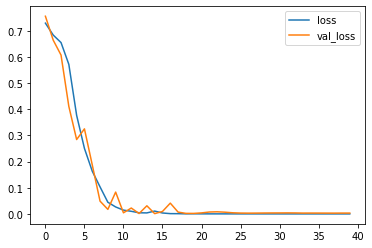

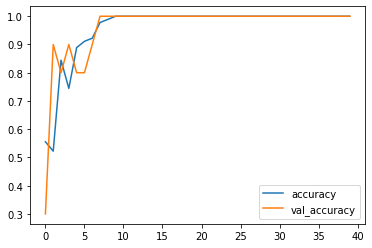

In [105]:
import pandas as pd

history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();

In [106]:
model2.save('Lung_cancer_model')

INFO:tensorflow:Assets written to: Lung_cancer_model\assets


In [107]:
from tensorflow.keras.models import load_model

In [108]:
model = load_model('Lung_cancer_model')

In [109]:
score1 = model.evaluate(input_test, output_test, verbose=0)
score1

[0.0032888047862797976, 1.0]

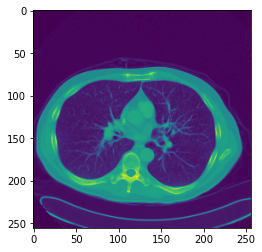

In [110]:
test_image1 = jimread(all_images_list[0])
plt.imshow(test_image1[0])

In [60]:
pred = model.predict(test_image1)